#This dataset is taken from the below link
https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 88% 21.0M/23.8M [00:01<00:00, 22.7MB/s]
100% 23.8M/23.8M [00:01<00:00, 14.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/book-recommendation-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd

In [5]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

<ipython-input-5-f6677f1956ea>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [6]:
books.shape

(271360, 8)

In [7]:
#print columns
print(books.columns)
print(ratings.columns)
print(users.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [8]:
#Display information about each dataframe
print(books.info())
print(ratings.info())
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2),

In [9]:
#Display sum of nulls for each dataframe
print('_________books__________')
print(books.isnull().sum())
print('_________ratings__________')
print(ratings.isnull().sum())
print('_________users__________')
print(users.isnull().sum())

_________books__________
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
_________ratings__________
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
_________users__________
User-ID          0
Location         0
Age         110762
dtype: int64


In [10]:
#Display duplicates for each dataframe
print(f"Books duplicate = {books.duplicated().sum()}")
print(f"Ratings duplicate = {ratings.duplicated().sum()}")
print(f"Users duplicate = {users.duplicated().sum()}")

Books duplicate = 0
Ratings duplicate = 0
Users duplicate = 0


Data Analysis

In [11]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [12]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [13]:
# Convert the 'object' type to numeric and find the minimum
print(pd.to_numeric(books['Year-Of-Publication'],errors='coerce').describe())

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64


In [14]:
yop = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

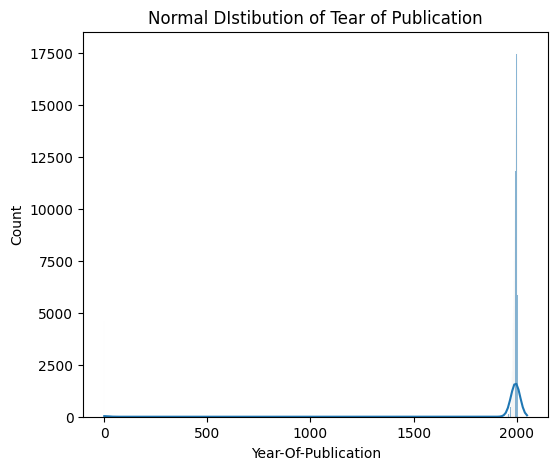

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.histplot(yop, kde=True)
plt.title('Normal DIstibution of Tear of Publication')
plt.show()

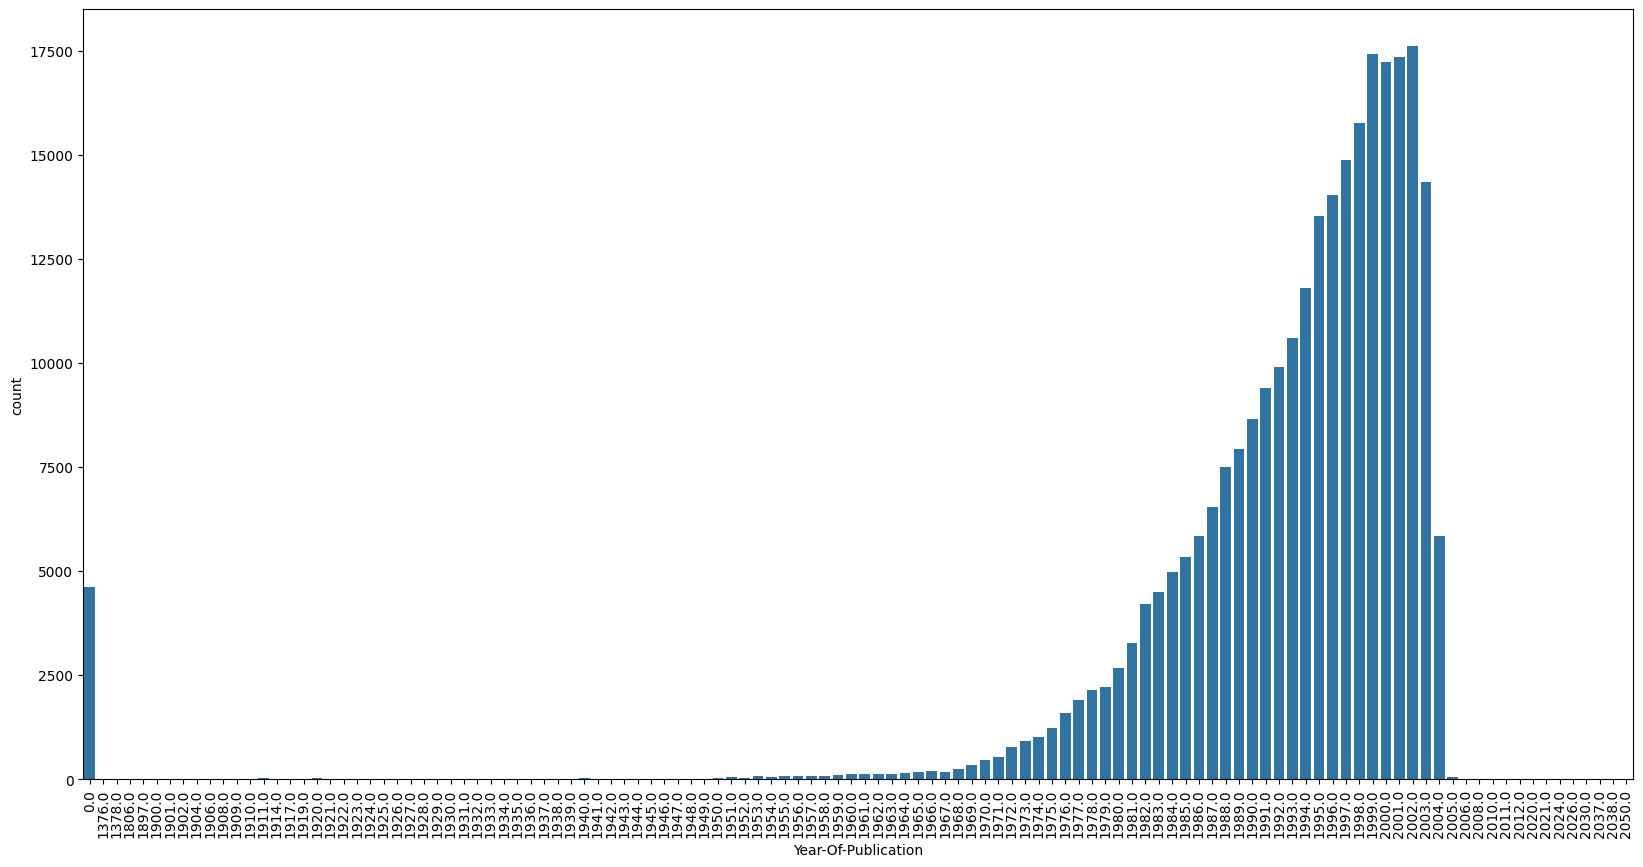

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x=yop)
plt.xticks(rotation=90)
plt.show()

In [17]:
#As we can see there are strange values like 0 and 2030 so we will neglect these values

books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')
books = books[(books['Year-Of-Publication']>1976) & (books['Year-Of-Publication']<2025) ]
books.shape

(257505, 8)

In [20]:
#Now lets evaluate Book Author column
books['Book-Author'].value_counts()

Agatha Christie        565
William Shakespeare    522
Stephen King           506
Ann M. Martin          423
Francine Pascal        372
                      ... 
Robert W. Bell           1
Jean Leinhauser          1
Sandra Mansfield         1
Charles Chaplin          1
Christopher  Biffle      1
Name: Book-Author, Length: 97241, dtype: int64

In [21]:
#Display top 3 authors -top 5 publishers
ac = books[books['Book-Author'] == 'Agatha Christie']
ws = books[books['Book-Author'] == 'William Shakespeare']
sk = books[books['Book-Author'] == 'Stephen King']

In [25]:
print("-------------Agatha Christie---------------")
print(ac['Publisher'].value_counts().head(5))
print("-------------William Shakespeare---------------")
print(ws['Publisher'].value_counts().head(5))
print("-------------Stephen King---------------")
print(sk['Publisher'].value_counts().head(5))

-------------Agatha Christie---------------
Berkley Publishing Group              102
Pocket                                 92
Scherz                                 47
Librairie des Champs-ElysÃ?Â©es        23
Harper Mass Market Paperbacks (Mm)     21
Name: Publisher, dtype: int64
-------------William Shakespeare---------------
Washington Square Press    62
Penguin Books              57
Signet Classics            31
Signet Book                30
Bantam                     24
Name: Publisher, dtype: int64
-------------Stephen King---------------
Signet Book         75
Heyne               31
Viking Books        23
Pocket              22
New Amer Library    21
Name: Publisher, dtype: int64


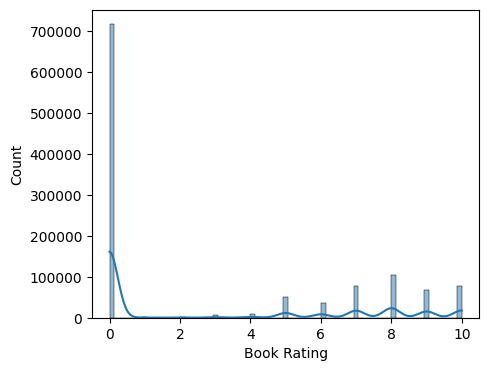

In [28]:
# Plot histogram of book ratings
plt.figure(figsize=(5,4))
sns.histplot(ratings['Book-Rating'],kde=True)
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

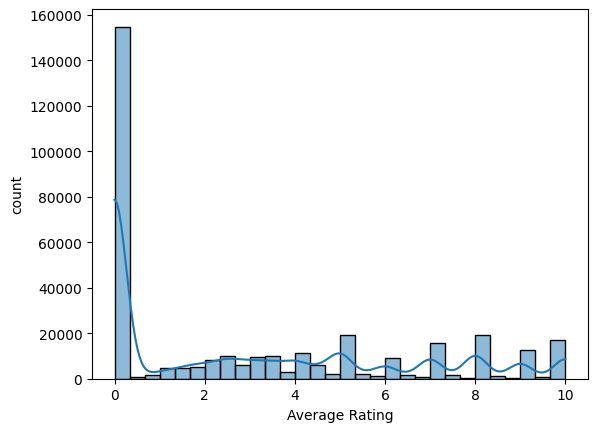

In [32]:
# Average rating per book
avg_rating_book = ratings.groupby('ISBN')['Book-Rating'].mean()
sns.histplot(avg_rating_book,bins=30,kde=True)
plt.xlabel("Average Rating")
plt.ylabel('count')
plt.show()

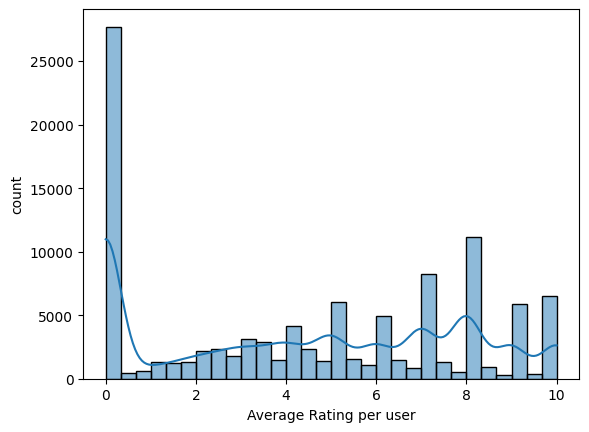

In [36]:
# Average rating per user
avg_rating_user = ratings.groupby('User-ID')['Book-Rating'].mean()
sns.histplot(avg_rating_user,bins=30,kde=True)
plt.xlabel("Average Rating per user")
plt.ylabel('count')
plt.show()

#Conclusions from above plots
More then 700K books were not rated
Average then 20K books were given 10 stars
More then 25000 Users did not rate any books

In [48]:
# Average rating per author
book1 = books.merge(ratings, on='ISBN')

In [49]:
book1.sample(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
470346,1551669048,Warrior,Elizabeth Lowell,2002.0,Mira,http://images.amazon.com/images/P/1551669048.0...,http://images.amazon.com/images/P/1551669048.0...,http://images.amazon.com/images/P/1551669048.0...,155733,0
47246,0451454243,The Forest House,Marion Zimmer Bradley,1995.0,Roc,http://images.amazon.com/images/P/0451454243.0...,http://images.amazon.com/images/P/0451454243.0...,http://images.amazon.com/images/P/0451454243.0...,242878,9


In [50]:
avg_rating_author= book1.groupby('Book-Author')['Book-Rating'].mean()
avg_rating_author

Book-Author
 D. Chiel                           2.5
 J. D. Landis                       0.0
 Mimma Balia                        8.0
'N Sync                             0.0
142 moms from all over the world    5.0
                                   ... 
Â¢ystein LÂ²nn                      7.0
Ã?dÃ¶n von HorvÃ¡th                 4.0
Ã?Â?dÃ?Â¶n von Horvath              5.0
Ã?Â?pictÃ?Â¨te                      4.5
Ã?Â?ric Holder                      0.0
Name: Book-Rating, Length: 96826, dtype: float64

In [56]:
top_10_authors = avg_rating_author.sort_values(ascending=False).head(10)
top_10_authors

Book-Author
John M. Huels                10.0
Suzanne J. E. Tourtillott    10.0
Ben Jacobs                   10.0
John Robert Marlow           10.0
John Gollop                  10.0
Suzanne Clemenz              10.0
Suzanne Collins              10.0
Maureen K. Minchin           10.0
Maureen Hill                 10.0
Maureen Boyd Biro            10.0
Name: Book-Rating, dtype: float64

In [57]:
# Merge relevant data for correlation analysis
merged_data = ratings.merge(books[['ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher','Book-Title']], on='ISBN')
merged_data = merged_data.merge(users[['User-ID', 'Age']], on='User-ID')
merged_data.head()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Book-Title,Age
0,276725,034545104X,0,M. J. Rose,2002.0,Ballantine Books,Flesh Tones: A Novel,NaN
1,2313,034545104X,5,M. J. Rose,2002.0,Ballantine Books,Flesh Tones: A Novel,23.0
2,2313,0812533550,9,Orson Scott Card,1986.0,Tor Books,Ender's Game (Ender Wiggins Saga (Paperback)),23.0
3,2313,0679745580,8,TRUMAN CAPOTE,1994.0,Vintage,In Cold Blood (Vintage International),23.0
4,2313,0060173289,9,Rebecca Wells,1996.0,HarperCollins,Divine Secrets of the Ya-Ya Sisterhood : A Novel,23.0


In [58]:
# Number of rows in the dataset
print(f"No of Rows {merged_data.shape[0]} and  columns {merged_data.shape[1]} ")

No of Rows 995669 and  columns 8 


In [59]:
final_df=merged_data.dropna()

In [60]:
final_df.head()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Book-Title,Age
1,2313,034545104X,5,M. J. Rose,2002.0,Ballantine Books,Flesh Tones: A Novel,23.0
2,2313,0812533550,9,Orson Scott Card,1986.0,Tor Books,Ender's Game (Ender Wiggins Saga (Paperback)),23.0
3,2313,0679745580,8,TRUMAN CAPOTE,1994.0,Vintage,In Cold Blood (Vintage International),23.0
4,2313,0060173289,9,Rebecca Wells,1996.0,HarperCollins,Divine Secrets of the Ya-Ya Sisterhood : A Novel,23.0
5,2313,0385482388,5,Chitra Banerjee Divakaruni,1998.0,Anchor Books/Doubleday,The Mistress of Spices,23.0


In [61]:
age_filtered_df = final_df[(final_df['Age'] >= 10) & (final_df['Age'] <= 60)]

In [62]:
df1=age_filtered_df.copy()

In [68]:
merged_data = age_filtered_df.copy()

#Creating a model

In [65]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162666 sha256=aaf6563b246d0bc3855d0c64328c7982a63f9fbc4719ac0b31e771d9fe5d42dd
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [66]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy


In [69]:
# Create a Reader object specifying the rating scale
reader = Reader(rating_scale=(0, 10))

# Load the data into a Surprise Dataset
data = Dataset.load_from_df(merged_data[['User-ID', 'ISBN', 'Book-Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [70]:
# Build the collaborative filtering model (SVD algorithm)
model = SVD()

# Train the model on the training set
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model's accuracy
accuracy.rmse(predictions)

RMSE: 3.5074


3.5073526377062394

In [71]:
merged_data["User-ID"].unique()

array([  2313,   6543,  23768, ..., 276265, 276647, 276660])

In [72]:
# Get top N book recommendations for a specific user
user_id_to_recommend = 2313
user_items = merged_data[merged_data['User-ID'] == user_id_to_recommend]['ISBN'].tolist()

# Create a list of books that the user hasn't rated
all_books = merged_data['ISBN'].unique()
books_to_recommend = [book for book in all_books if book not in user_items]

# books_to_recommend

In [73]:
# Predict ratings for the user on unrated books
user_ratings = [(user_id_to_recommend, book, model.predict(user_id_to_recommend, book).est) for book in books_to_recommend]
# user_ratings

In [74]:
# Sort the predictions and get the top N recommendations
top_n_recommendations = sorted(user_ratings, key=lambda x: x[2], reverse=True)[:10]

top_n_recommendations

[(2313, '0312195516', 9.547571260528295),
 (2313, '0385335482', 9.411987016898266),
 (2313, '0440215625', 9.29927969715469),
 (2313, '2226135022', 9.14076928147729),
 (2313, '0684867621', 9.092550480225967),
 (2313, '043935806X', 8.955671659551115),
 (2313, '0670032379', 8.94459408725216),
 (2313, '1844262553', 8.866903803371954),
 (2313, '3257229534', 8.865805888059464),
 (2313, '0786808551', 8.810388620807165)]

In [75]:
# Display the top N recommendations
recommended_books = [(book_id, merged_data[merged_data['ISBN'] == book_id]['Book-Title'].iloc[0]) for (_, book_id, _) in top_n_recommendations]
print(f"Top 10 Recommendations for User {user_id_to_recommend}:\n")
for idx, (book_id, title) in enumerate(recommended_books, start=1):
    print(f"{idx}. {title} (ISBN: {book_id})")

Top 10 Recommendations for User 2313:

1. The Red Tent (Bestselling Backlist) (ISBN: 0312195516)
2. Confessions of a Shopaholic (Summer Display Opportunity) (ISBN: 0385335482)
3. Dragonfly in Amber (ISBN: 0440215625)
4. Oscar et la dame rose (ISBN: 2226135022)
5. The Girl Who Loved Tom Gordon : A Novel (ISBN: 0684867621)
6. Harry Potter and the Order of the Phoenix (Book 5) (ISBN: 043935806X)
7. The Secret Life of Bees (ISBN: 0670032379)
8. Free (ISBN: 1844262553)
9. Der Vorleser (ISBN: 3257229534)
10. The Arctic Incident (Artemis Fowl, Book 2) (ISBN: 0786808551)
